In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#импортируем необходимые библиотеки)
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [ ]:
df.describe()
#bmi - индекса массы тела 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
import matplotlib.pyplot as plt

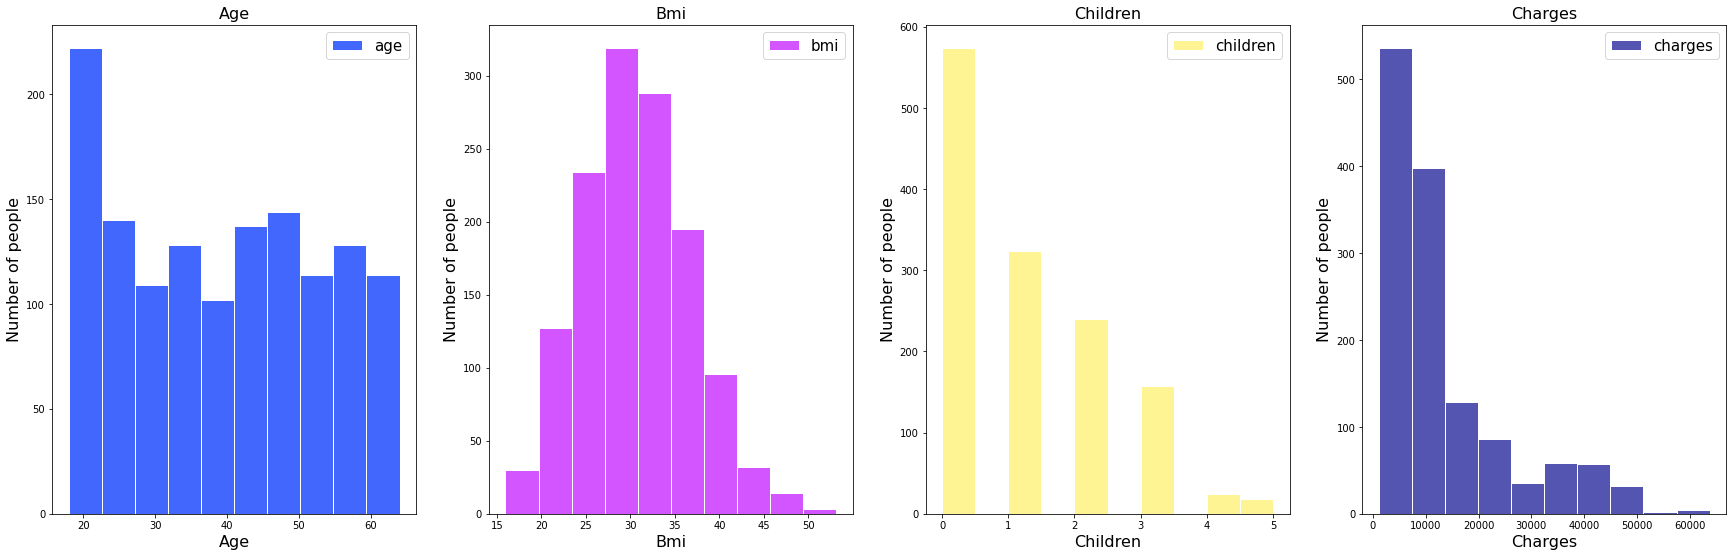

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(30,9))
ax[0].set_title('Age', fontsize = 16)
ax[0].hist(df['age'], edgecolor = '#FFFFFF', color = '#4167FD', bins=10, label='age')
ax[0].set_xlabel('Age', fontsize = 16)
ax[0].set_ylabel('Number of people', fontsize = 16)
ax[0].legend(fontsize=15)


ax[1].set_title('Bmi', fontsize = 16)
ax[1].hist(df['bmi'], edgecolor = '#FFFFFF', color = '#D355FF', bins = 10, label='bmi')
ax[1].set_xlabel('Bmi', fontsize = 16)
ax[1].set_ylabel('Number of people', fontsize = 16)
ax[1].legend(fontsize=15)

ax[2].set_title('Children', fontsize = 16)
ax[2].hist(df['children'], edgecolor = '#FFFFFF', color = '#FFF494', bins = 10, label='children')
ax[2].set_xlabel('Children', fontsize = 16)
ax[2].set_ylabel('Number of people', fontsize = 16)
ax[2].legend(fontsize=15)

ax[3].set_title('Charges', fontsize = 16)
ax[3].hist(df['charges'], edgecolor = '#FFFFFF', color = '#5455B1', bins = 10, label='charges')
ax[3].set_xlabel('Charges', fontsize = 16)
ax[3].set_ylabel('Number of people', fontsize = 16)
ax[3].legend(fontsize=15)

меры центральной тенденции - мода,медиана,среднее

меры разброса - Дисперсия,Размах, Стандартное отклонение,Межквартильный размах (IQR),
стандартной ошибкой среднего (SE)

Найти меры центральной тенденции и меры разброса для индекса массы
тела (bmi) и расходов (charges). Отобразить результаты в виде текста и
на гистограммах (3 вертикальные линии). Добавить легенду на графики.
Сделать выводы

In [ ]:
import scipy.stats as sts

In [ ]:
srednie = np.mean(df['bmi'])
moda = sts.mode(df['bmi'].sort_values())
mediana = np.median(df['bmi'])

srednie1 = np.mean(df['charges'])
moda1 = sts.mode(df['charges'].sort_values())
mediana1 = np.median(df['charges'])

print("Для идекса массы тела: ")
print("Среднее: ", srednie)
print("Мода: ", float(moda[0]))
print("Медиана: ", mediana)
print()
print("Для расходов: ")
print("Среднее: ", srednie1)
print("Мода: ", float(moda1[0]))
print("Медиана: ", mediana1)

Для идекса массы тела: 
Среднее:  30.66339686098655
Мода:  32.3
Медиана:  30.4

Для расходов: 
Среднее:  13270.422265141257
Мода:  1639.5631
Медиана:  9382.033


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
dat = {'name': ['mean', 'mode', 'median'], 'counts': [srednie,float(moda[0]),mediana]} 

fig = px.histogram(dat, x="name",y ="counts", color="name",  log_y=True)
fig.update_layout(title="Bmi")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.95,
    xanchor="right",
    x=0.95
))
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
dat2 = {'name': ['mean', 'mode', 'median'], 'counts': [srednie1,float(moda1[0]),mediana1]} 
fig = px.histogram(dat2, x="name",y ="counts", color="name",  log_y=True)
fig.update_layout(title="Charges")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.95,
    xanchor="center",
    x=0.5
))
fig.show()

In [ ]:
#seaborn
'''
dat2 = {'name': ['mean', 'mode', 'median'], 'counts': [srednie1,float(moda1[0]),mediana1]} 
s1=sns.histplot(data=dat2, x="name",y = "counts",hue="name")
'''

In [ ]:
std1 = df['bmi'].std() # Стандартное отклонение
raz = df['bmi'].max() - df['bmi'].min() # Размах
q1 = np.percentile(df['bmi'], 25, interpolation = 'midpoint')
q3 = np.percentile(df['bmi'], 75, interpolation = 'midpoint')
iqr1 = q3 - q1
iqr2 = sts.iqr(df['bmi'], interpolation = 'midpoint')

std2 = df['charges'].std() # Стандартное отклонение
raz1 = df['charges'].max() - df['charges'].min() # Размах
q11 = np.percentile(df['charges'], 25, interpolation = 'midpoint')
q31 = np.percentile(df['charges'], 75, interpolation = 'midpoint')
iqr11 = q31 - q11
iqr21 = sts.iqr(df['charges'], interpolation = 'midpoint')
 # Межквартильный размах (IQR) - разность между Q3 (75%) и Q1 (25%), 
#это ширина интервала, который содержит 50% данных.

print("Для идекса массы тела: ")
print("Стандартное отклонение: ", std1)
print("Размах: ", raz)
print("Первый квартиль: ", q1)
print("Третий квартиль: ", q3)
print("Межквартильный размах (IQR) numpy: ", iqr1)
print("Межквартильный размах (IQR): ", iqr2)
print()
print("Для расходов: ")
print("Стандартное отклонение: ", std2)
print("Размах: ", raz1)
print("Первый квартиль: ", q11)
print("Третий квартиль: ", q31)
print("Межквартильный размах (IQR) numpy: ", iqr11)
print("Межквартильный размах (IQR): ", iqr21)

Для идекса массы тела: 
Стандартное отклонение:  6.098186911679014
Размах:  37.17
Первый квартиль:  26.302500000000002
Третий квартиль:  34.6875
Межквартильный размах (IQR) numpy:  8.384999999999998
Межквартильный размах (IQR):  8.384999999999998

Для расходов: 
Стандартное отклонение:  12110.011236694001
Размах:  62648.554110000005
Первый квартиль:  4742.3061
Третий квартиль:  16622.10758
Межквартильный размах (IQR) numpy:  11879.80148
Межквартильный размах (IQR):  11879.80148


In [ ]:
dat3 = {'name': ['Стандартное отклонение', 'Размах', 'Межквартильный размах (IQR)'], 'counts': [std1,raz,iqr2]} 
dat4 = {'name': ['Стандартное отклонение', 'Размах', 'Межквартильный размах (IQR)'], 'counts': [std2,raz1,iqr21]} 

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.histogram(dat3, x="name",y ="counts", color="name",  log_y=True)
fig.update_layout(title="Charges")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.95,
    xanchor="left",
    x=0.04
))
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.histogram(dat4, x="name",y ="counts", color="name",  log_y=True)
fig.update_layout(title="Charges")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.95,
    xanchor="left",
    x=0.04
))
fig.show()

Построить box-plot для числовых показателей. Названия графиков 
должны соответствовать названиям признаков. Сделать выводы.

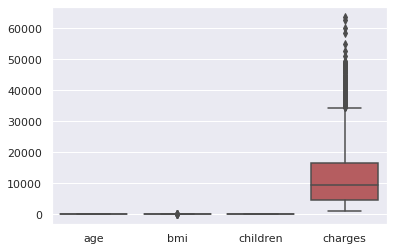

In [ ]:
import seaborn as sns
sns.boxplot(data=df)

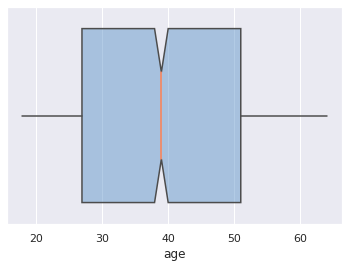

In [ ]:
sns.boxplot(
    data=df, x="age",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

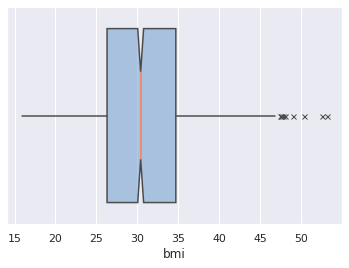

In [ ]:
sns.boxplot(
    data=df, x="bmi",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

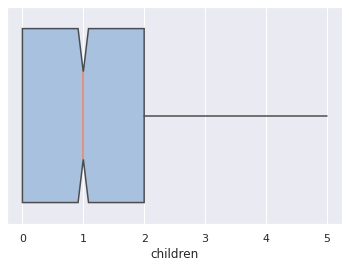

In [ ]:
sns.boxplot(
    data=df, x="children",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

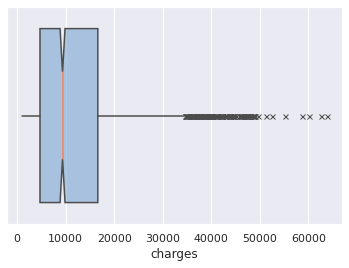

In [ ]:
sns.boxplot(
    data=df, x="charges",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

Используя признак charges или imb, проверить, выполняется ли 
центральная предельная теорема. Использовать различные длины 
выборок n. Количество выборок = 300. Вывести результат в виде 
гистограмм. Найти стандартное отклонение и среднее для полученных 
распределений. Сделать выводы.


In [ ]:
import statistics
import scipy.stats as sps

In [ ]:
from numpy import mean
import statistics as st

# меняешь n
n = 500
means = [mean(df['bmi'].sample(n)) for _ in range(300)]
print('Среднее средних ', mean(means))
print('Стандартное отклонение ', st.stdev(means))
fig = go.Figure(data=[go.Histogram(x=means, name='bmi')])
fig.show()

Среднее средних  30.65297466666667
Стандартное отклонение  0.2131714492142164


In [ ]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(16, 9))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

In [ ]:
show_pdf(
    pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=0.5, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=0, scale=1
)
#loc-математическое ожидание: a,
#scale-дисперсия:  σ**2

In [ ]:
print(df['charges'].var())
print(df['charges'].mean())

146652372.15285498
13270.422265141257


Дисперсия charges:  146652372.15285498


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



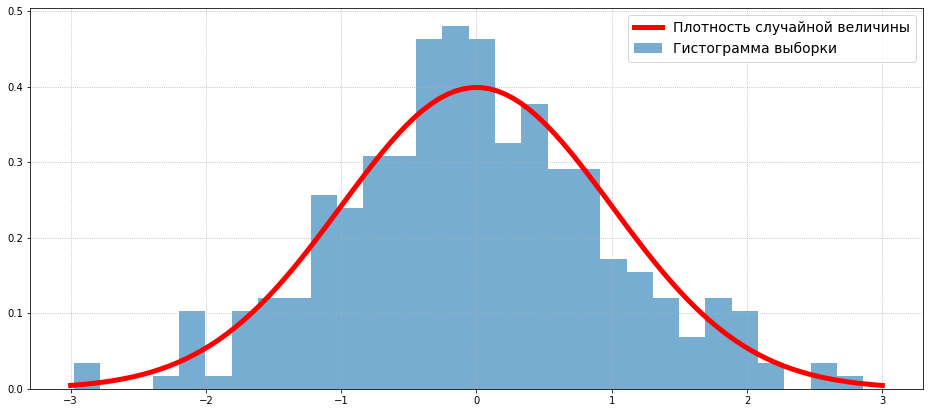

In [ ]:
import statistics
import scipy.stats as sps
print("Дисперсия charges: ",df.var()['charges'])
sample = sps.norm.rvs(size=300)
#sample = df['charges'].sample (n=300)
#print (sample.head())
statistics.stdev(sample)
#stdev()-Возвращает стандартное отклонение выборки
grid = np.linspace(-3, 3, 100)  # сетка для построения графика

plt.figure(figsize=(16, 7))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки') 
plt.plot(grid, sps.norm.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 

plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

In [ ]:
import scipy.stats as st
b95=st.norm.interval(alpha=0.95, loc=np.mean(df['bmi']), scale=st.sem(df['bmi']))
b99 = sts.norm.interval(alpha=0.99, loc=np.mean(df['bmi']), scale=sts.sem(df['bmi']))
print('bmi 95% = ', *b95)
print('bmi 99% = ', *b99)

ch95 = sts.norm.interval(alpha=0.95, loc=np.mean(df['charges']), scale=sts.sem(df['charges']))
ch99 = sts.norm.interval(alpha=0.99, loc=np.mean(df['charges']),scale=sts.sem(df['charges']))
print('charges 95% = ', *ch95)
print('chargrs 99% = ', *ch99)

bmi 95% =  30.336642971534822 30.990150750438275
bmi 99% =  30.233969458168303 31.092824263804793
charges 95% =  12621.54197822916 13919.302552053354
chargrs 99% =  12417.649014863586 14123.195515418927


KstestResult(statistic=0.035672679378215055, pvalue=0.8264058348428946)


<function matplotlib.pyplot.show(*args, **kw)>

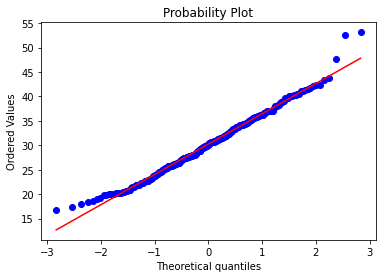

In [ ]:
import pylab
sample_bmi = df['bmi'].sample(300)
kstest_bmi = sts.kstest(sts.zscore(sample_bmi), 'norm')
print(kstest_bmi)
sts.probplot(sample_bmi, dist= 'norm',plot=pylab)
pylab.show

KstestResult(statistic=0.03611341927886724, pvalue=0.8151303505202714)


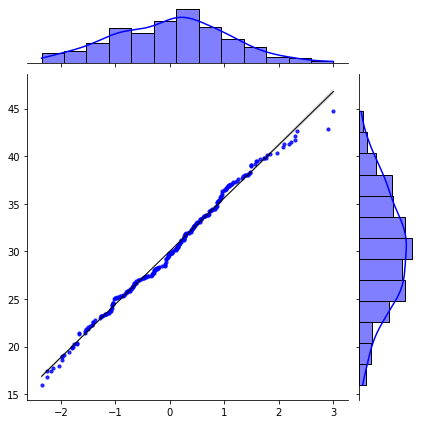

In [ ]:
import seaborn as sns
q2_bmi = df.bmi.sample(300).values.tolist()
q12_bmi_s = sts.norm.rvs(size=len(q2_bmi))
q2_bmi.sort()
q12_bmi_s.sort()

print(sts.kstest(sts.zscore(q2_bmi), 'norm'))

sns.jointplot(x=q12_bmi_s,y=q2_bmi,kind='reg',truncate=True,color='b',
              scatter_kws={'s':10}, line_kws={'lw':1, 'color':'black'}
)

KstestResult(statistic=0.1779303636475139, pvalue=8.84193579800997e-09)


<function matplotlib.pyplot.show(*args, **kw)>

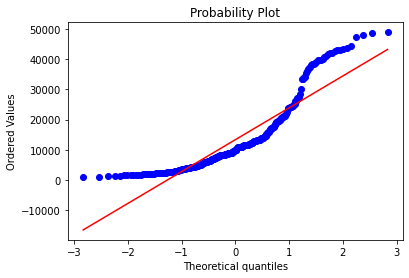

In [ ]:
import pylab
sample_charges = df['charges'].sample(300)
kstest_charges = sts.kstest(sts.zscore(sample_charges), 'norm')
print(kstest_charges)
sts.probplot(sample_charges, dist= 'norm',plot=pylab)
pylab.show

KstestResult(statistic=0.1934565910672671, pvalue=2.61090385430657e-10)


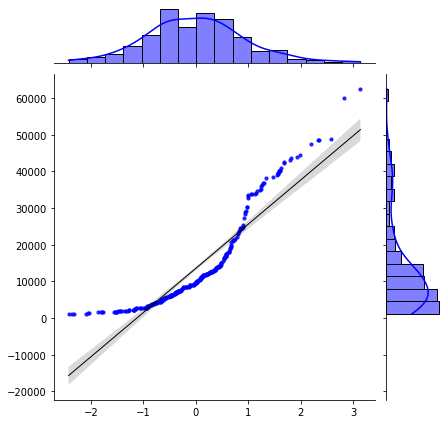

In [ ]:
import seaborn as sns

q2_ch = df.charges.sample(300).values.tolist()
q12_ch_s = sts.norm.rvs(size=len(q2_ch))
q2_ch.sort()
q12_ch_s.sort()

print(sts.kstest(sts.zscore(q2_ch), 'norm'))

sns.jointplot(x=q12_ch_s, y=q2_ch,kind='reg', truncate=True,
    color='b', scatter_kws={'s':10}, line_kws={'lw':1, 'color':'black'}
)